<a href="https://colab.research.google.com/github/pranishasharma/Python-project/blob/main/YT_data_analytics_Project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
api_key = '**************************************'

channel_ids = ['UCwRH985XgMYXQ6NxXDo8npw', #KurzgesagtDE
               'UCxec_VgCE-5DUZ8MocKbEdg', #SWR Marktcheck
               'UCBzai1GXVKDdVCrwlKZg_6Q', #pulsreportage
               'UC1XrG1M_hw8103zO2x-oivg', #GalileoOffiziell
               'UCZuFrqyZWfw_Zf0OnXWUXyQ'] #bayerischerrundfunk

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
#  defining a function to retrieve statistical information about YouTube channels.
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [4]:
get_channel_stats(youtube, channel_ids)

[{'Channel_name': 'Bayerischer Rundfunk',
  'Subscribers': '735000',
  'Views': '296941364',
  'Total_videos': '4163',
  'playlist_id': 'UUZuFrqyZWfw_Zf0OnXWUXyQ'},
 {'Channel_name': 'Dinge Erklärt – Kurzgesagt',
  'Subscribers': '2190000',
  'Views': '269955516',
  'Total_videos': '139',
  'playlist_id': 'UUwRH985XgMYXQ6NxXDo8npw'},
 {'Channel_name': 'PULS Reportage',
  'Subscribers': '883000',
  'Views': '370589225',
  'Total_videos': '1034',
  'playlist_id': 'UUBzai1GXVKDdVCrwlKZg_6Q'},
 {'Channel_name': 'SWR Marktcheck',
  'Subscribers': '588000',
  'Views': '356025970',
  'Total_videos': '2426',
  'playlist_id': 'UUxec_VgCE-5DUZ8MocKbEdg'},
 {'Channel_name': 'Galileo',
  'Subscribers': '3230000',
  'Views': '3046325335',
  'Total_videos': '6170',
  'playlist_id': 'UU1XrG1M_hw8103zO2x-oivg'}]

In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [6]:
channel_data = pd.DataFrame(channel_statistics)

In [7]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,PULS Reportage,883000,370589225,1034,UUBzai1GXVKDdVCrwlKZg_6Q
1,Bayerischer Rundfunk,735000,296941364,4163,UUZuFrqyZWfw_Zf0OnXWUXyQ
2,SWR Marktcheck,588000,356025970,2426,UUxec_VgCE-5DUZ8MocKbEdg
3,Dinge Erklärt – Kurzgesagt,2190000,269955516,139,UUwRH985XgMYXQ6NxXDo8npw
4,Galileo,3230000,3046325335,6170,UU1XrG1M_hw8103zO2x-oivg


In [8]:
# changing the data types to numeric
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

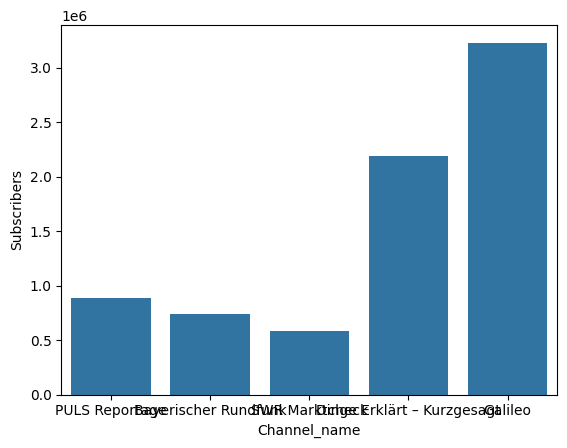

In [9]:
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

Text(0.5, 1.0, 'YouTube Channel Subscribers Count')

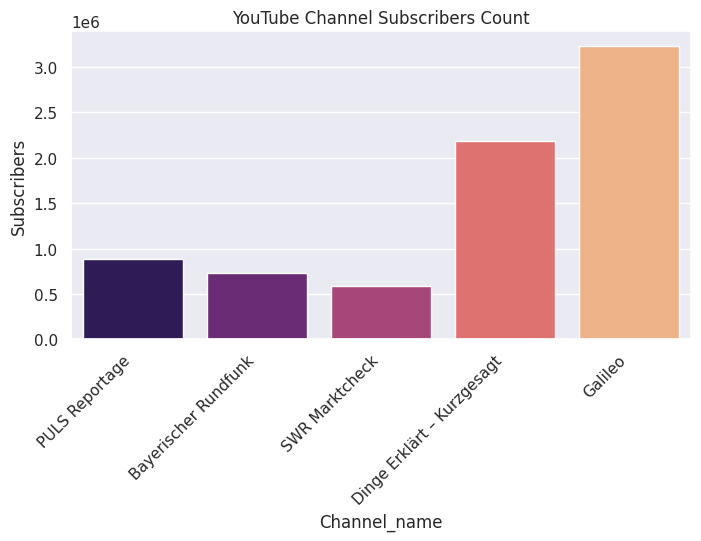

In [10]:
# lets make the above plot better
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)
plt.title("YouTube Channel Subscribers Count")


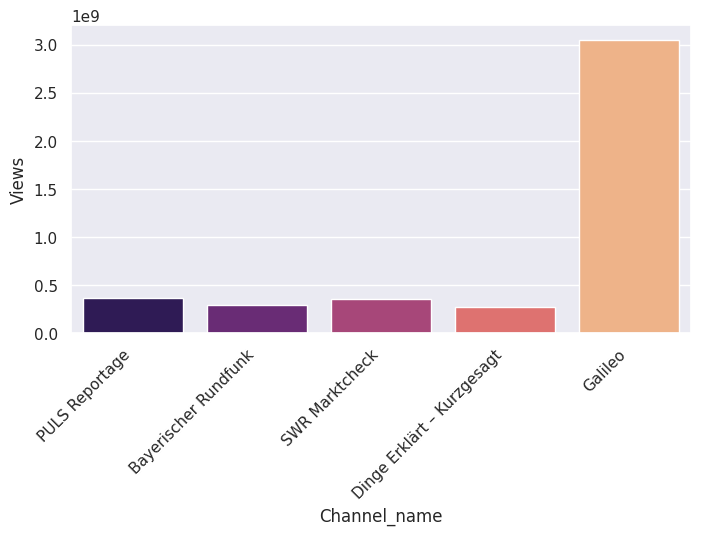

In [11]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

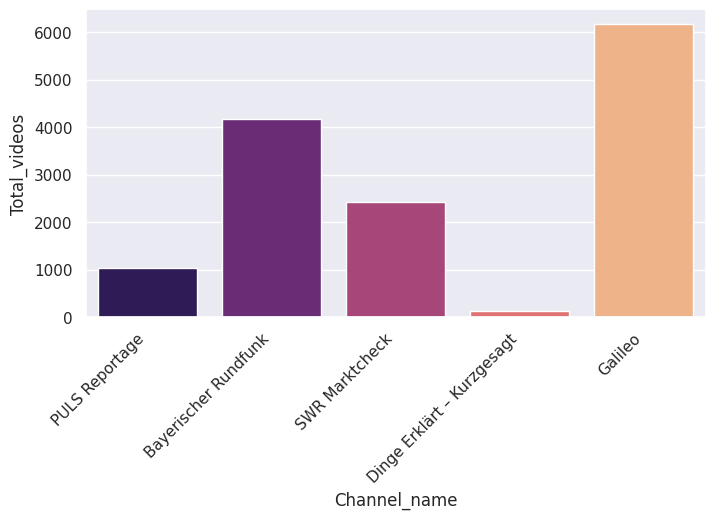

In [12]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

# **Function to get video IDs**

In [13]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,PULS Reportage,883000,370589225,1034,UUBzai1GXVKDdVCrwlKZg_6Q
1,Bayerischer Rundfunk,735000,296941364,4163,UUZuFrqyZWfw_Zf0OnXWUXyQ
2,SWR Marktcheck,588000,356025970,2426,UUxec_VgCE-5DUZ8MocKbEdg
3,Dinge Erklärt – Kurzgesagt,2190000,269955516,139,UUwRH985XgMYXQ6NxXDo8npw
4,Galileo,3230000,3046325335,6170,UU1XrG1M_hw8103zO2x-oivg


In [14]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Galileo', 'playlist_id'].iloc[0]

In [15]:
playlist_id

'UU1XrG1M_hw8103zO2x-oivg'

In [16]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=5)
    response = request.execute()

    return response

In [17]:
get_video_ids(youtube, playlist_id)
#  Here we get the entire API response.

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'VD86zxM9BdoT4hxEBuevwOi-JXI',
 'nextPageToken': 'EAAafVBUOkNBVWlFRVE0UWpnMU1VRTRRVE0wUmtNNU5UQW9BVWpXMmRTLTNvR0ZBMUFCV2pnaVEyaG9WbFpVUmxsamEyTjRWRlk1YjJSNlozaE5SRTQyVkhwS05FeFhPWEJrYldOVFJFRnFiMmhQYlhaQ2FFUjNjRFJUZFVGM0ln',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': '-XNDA0darKZNxPjJTlBjmIpPxBI',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLkpVeXdIZkV5a2E4',
   'contentDetails': {'videoId': 'JUywHfEyka8',
    'videoPublishedAt': '2024-03-19T11:30:09Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'Lhoae-6mtlGJfYjcr3DUh0fk_rg',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLldQUGVZYzdxckNr',
   'contentDetails': {'videoId': 'WPPeYc7qrCk',
    'videoPublishedAt': '2024-03-18T17:30:10Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'g-bebzsEHWl7fKn4Q_k3JSc1GFs',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLk40M0REanhoZmdj',
   'contentDetails': {'videoId': 'N43DDjxhfgc',
    'videoPublishedAt': '2024-03-18T15:02:34Z'}},
  {'

In [18]:
# Modify the functiont to obtain a list of video IDs
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
      if next_page_token is None:
          more_pages = False
      else:
          request = youtube.playlistItems().list(
                      part='contentDetails',
                      playlistId=playlist_id,
                      maxResults=50,
                      pageToken=next_page_token)
          response = request.execute()

      for i in range(len(response['items'])):
          video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_token = response.get('nextPageToken')

    return video_ids


In [19]:
video_ids = get_video_ids(youtube, playlist_id)

In [20]:
sample_video_ids = video_ids[-5:]
sample_video_ids

['qJvx3h1vcc8', 'qxnhfbJKHso', 'SPAuhZyqQUU', 'PA2Vw6J-4qs', 'YC4I1_TYzT8']

## **Function to get video details**

In [21]:

def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        try:
            request = youtube.videos().list(
                part='snippet,statistics',
                id=','.join(video_ids[i:i+50])
            )
            response = request.execute()

            for video in response['items']:
                video_stats = dict(
                    Title=video['snippet']['title'],
                    Published_date=video['snippet']['publishedAt'],
                    Views=video['statistics']['viewCount'],
                    Likes=video['statistics'].get('likeCount', 0),  # Handle missing like count
                    #Dislikes=video['statistics'].get('dislikeCount', 0),
                    Comments=video['statistics'].get('commentCount', 0)
                )
                all_video_stats.append(video_stats)
        except Exception as e:
            print(f"Error fetching video details: {str(e)}")

    return all_video_stats


In [22]:
video_details = get_video_details(youtube, video_ids)

In [23]:
video_data = pd.DataFrame(video_details)

In [24]:
video_data

,Title,Published_date,Views,Likes,Comments
0,"Schrill, bunt, Kult: Wie tickt der Schweizer U...",2024-03-19T11:30:09Z,31278,368,38
1,Der verrückteste Supermarkt Amerikas! Willkomm...,2024-03-18T17:30:10Z,44722,643,45
2,Da kann man seinen Augen kaum glauben! 👀,2024-03-18T15:02:34Z,6213,179,2
3,Erkundungstour mit Rabbi Yoni Katz: Die verbor...,2024-03-18T11:30:24Z,16354,235,70
4,"Geheimnisse der Metropole: ""Galileo"" und die v...",2024-03-17T11:30:31Z,73626,771,41
...,...,...,...,...,...
6187,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27T07:35:13Z,253485,1174,22
6188,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27T07:34:19Z,24909,117,5
6189,Speedwissen: Körperpflege | Galileo,2013-09-27T07:33:20Z,951419,6084,541
6190,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27T07:33:03Z,37192,271,39


In [25]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,"Schrill, bunt, Kult: Wie tickt der Schweizer U...",2024-03-19,31278,368,38
1,Der verrückteste Supermarkt Amerikas! Willkomm...,2024-03-18,44722,643,45
2,Da kann man seinen Augen kaum glauben! 👀,2024-03-18,6213,179,2
3,Erkundungstour mit Rabbi Yoni Katz: Die verbor...,2024-03-18,16354,235,70
4,"Geheimnisse der Metropole: ""Galileo"" und die v...",2024-03-17,73626,771,41
...,...,...,...,...,...
6187,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253485,1174,22
6188,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24909,117,5
6189,Speedwissen: Körperpflege | Galileo,2013-09-27,951419,6084,541
6190,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37192,271,39


In [26]:
top10_videos = video_data.sort_values(by='Views',ascending=False).head(10)

In [27]:
top10_videos

,Title,Published_date,Views,Likes,Comments
5714,Wahnsinn! Unglaubliches über den menschlichen ...,2015-06-14,38440275,36495,1780
5768,1 Tag Geschlechtsumwandlung: Aus Mann mach Fra...,2015-05-11,14871825,111767,7844
6059,"""C-String"" - Der kleinste Bikini der Welt! Der...",2014-01-11,13238906,26505,2300
3499,Der größte Teenager der Welt - wie lebt es sic...,2018-07-28,13021613,109747,9387
5876,18.000€ - Das teuerste Luxus-Flugticket der We...,2015-02-03,11181036,99720,6381
5549,80kg! Hulk ist der größte Pitbull der Welt! | ...,2015-09-16,10631646,79403,4858
4102,Spicker im Test - Lehrer vs. Schüler | Galileo...,2017-10-02,9671309,133488,6022
4984,25 Jahre nur Pizza essen!? Wie (un)gesund ist ...,2016-07-08,9546693,96824,10661
5330,Türkische Hochzeit - So pompös wird gefeiert! ...,2016-01-18,9124293,61367,7410
5928,Viagra für Frauen?! 15 intime Mythen | Galileo...,2014-10-29,8262294,41206,2000


In [ ]:
# top10_videos.replace(to_replace="How Statistics Saved the US SERIOUS $$$$ During WW2 #Shorts",
#            value="How Statistics Saved the US SERIOUS Dollars During WW2 #Shorts",inplace=True)

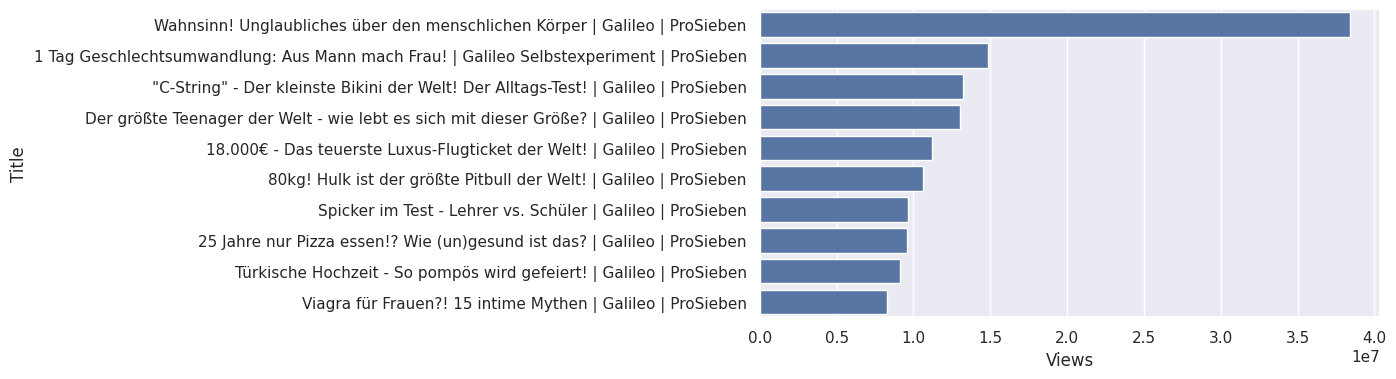

In [28]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

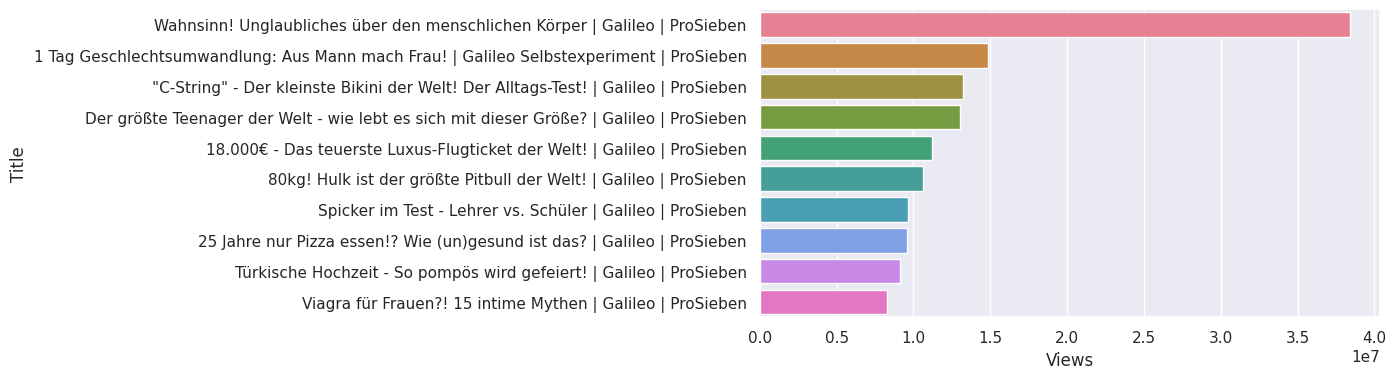

In [29]:
colors = sns.color_palette('husl', n_colors=len(top10_videos))
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos,palette=colors, hue='Title')

In [30]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [31]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,"Schrill, bunt, Kult: Wie tickt der Schweizer U...",2024-03-19,31278,368,38,Mar
1,Der verrückteste Supermarkt Amerikas! Willkomm...,2024-03-18,44722,643,45,Mar
2,Da kann man seinen Augen kaum glauben! 👀,2024-03-18,6213,179,2,Mar
3,Erkundungstour mit Rabbi Yoni Katz: Die verbor...,2024-03-18,16354,235,70,Mar
4,"Geheimnisse der Metropole: ""Galileo"" und die v...",2024-03-17,73626,771,41,Mar
...,...,...,...,...,...,...
6187,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253485,1174,22,Sep
6188,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24909,117,5,Sep
6189,Speedwissen: Körperpflege | Galileo,2013-09-27,951419,6084,541,Sep
6190,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37192,271,39,Sep


In [32]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [33]:
videos_per_month

,Month,size
0,Apr,471
1,Aug,460
2,Dec,551
3,Feb,520
4,Jan,568
5,Jul,471
6,Jun,492
7,Mar,519
8,May,498
9,Nov,557


In [34]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [35]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [36]:
videos_per_month = videos_per_month.sort_index()

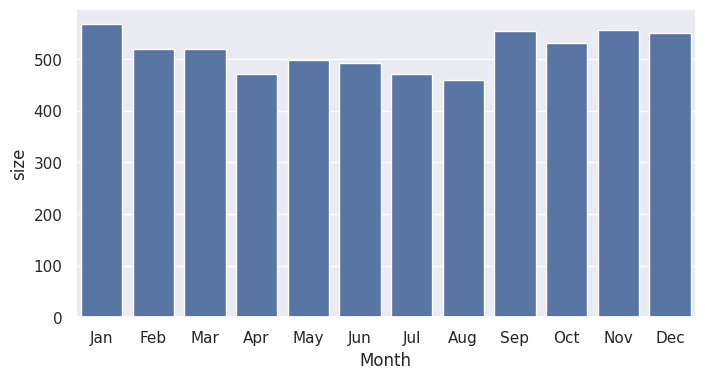

In [37]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [ ]:
# video_data.to_csv('Video_Details(YT Channels data).csv')